# Library

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataraw_train = pd.read_csv('/content/drive/MyDrive/VIX/Dataset final project home credit indonesia/application_train.csv')
dataraw_test = pd.read_csv('/content/drive/MyDrive/VIX/Dataset final project home credit indonesia/application_test.csv')

In [ ]:
frames = [dataraw_train, dataraw_test]
dataraw = pd.concat(frames)

# Exporting data

In [ ]:
dataraw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
dataraw.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
dataraw_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
dataraw_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
dataraw_train.shape

(307511, 122)

In [ ]:
dataraw['COMMONAREA_AVG'].isna().sum()

248360

Pembuangan fitur-fitur yang tidak berguna dilakukan yaitu fitur yang memiliki nilai kosong (NaN) >75% total jumlah data

In [ ]:
cols_to_drop = [
    #null
    'OWN_CAR_AGE'
    ,'EXT_SOURCE_1'
    ,'APARTMENTS_AVG'
    ,'BASEMENTAREA_AVG'
    ,'YEARS_BEGINEXPLUATATION_AVG'
    ,'YEARS_BUILD_AVG'
    ,'COMMONAREA_AVG'
    ,'ELEVATORS_AVG'
    ,'ENTRANCES_AVG'
    ,'FLOORSMAX_AVG'
    ,'FLOORSMIN_AVG'
    ,'LANDAREA_AVG'
    ,'LIVINGAPARTMENTS_AVG'
    ,'LIVINGAREA_AVG'
    ,'NONLIVINGAPARTMENTS_AVG'
    ,'NONLIVINGAREA_AVG'
    ,'APARTMENTS_MODE'
    ,'BASEMENTAREA_MODE'
    ,'YEARS_BEGINEXPLUATATION_MODE'
    ,'YEARS_BUILD_MODE'
    ,'COMMONAREA_MODE'
    ,'ELEVATORS_MODE'
    ,'ENTRANCES_MODE'
    ,'FLOORSMAX_MODE'
    ,'FLOORSMIN_MODE'
    ,'LANDAREA_MODE'
    ,'LIVINGAPARTMENTS_MODE'
    ,'LIVINGAREA_MODE'
    ,'NONLIVINGAPARTMENTS_MODE'
    ,'NONLIVINGAREA_MODE'
    ,'APARTMENTS_MEDI'
    ,'BASEMENTAREA_MEDI'
    ,'YEARS_BEGINEXPLUATATION_MEDI'
    ,'YEARS_BUILD_MEDI'
    ,'COMMONAREA_MEDI'
    ,'ELEVATORS_MEDI'
    ,'ENTRANCES_MEDI'
    ,'FLOORSMAX_MEDI'
    ,'FLOORSMIN_MEDI'
    ,'LANDAREA_MEDI'
    ,'LIVINGAPARTMENTS_MEDI'
    ,'LIVINGAREA_MEDI'
    ,'NONLIVINGAPARTMENTS_MEDI'
    ,'NONLIVINGAREA_MEDI'
    ,'FONDKAPREMONT_MODE'
    ,'HOUSETYPE_MODE'
    ,'TOTALAREA_MODE'
    ,'WALLSMATERIAL_MODE'
    ,'EMERGENCYSTATE_MODE'
]

In [ ]:
data_train = dataraw_train.drop(cols_to_drop, axis =1)
data_test = dataraw_test.drop(cols_to_drop, axis =1)

In [ ]:
data_test.shape

(48744, 72)

# Data visualization

In [ ]:
data_train['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

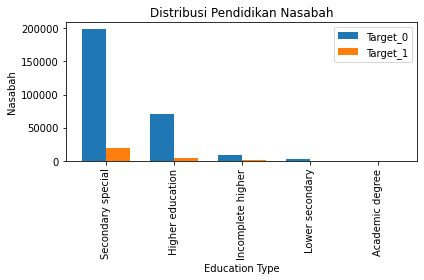

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


x = ['Secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
target_0 = [198867, 70854, 9405, 3399, 161]
target_1 = [19524, 4009, 872, 417, 3]
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bar1 = np.arange(len(x))
bar2 = [i+width for i in bar1]

plt.bar(bar1, target_0, width, label='Target_0')
plt.bar(bar2, target_1, width, label='Target_1')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Nasabah')
plt.xlabel('Education Type')
plt.title('Distribusi Pendidikan Nasabah')
plt.xticks(bar1+width/2, x, rotation=90)
plt.legend()
plt.ylim(ymin=0)

fig.tight_layout()

plt.show()

In [ ]:
data_train['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

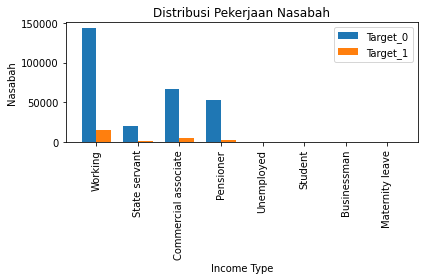

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


x = ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
target_0 = [143550, 20454, 66257, 52380, 14, 18, 10, 3]
target_1 = [15224, 1249, 5360, 2982, 8, 0, 0, 2]
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bar1 = np.arange(len(x))
bar2 = [i+width for i in bar1]

plt.bar(bar1, target_0, width, label='Target_0')
plt.bar(bar2, target_1, width, label='Target_1')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Nasabah')
plt.xlabel('Income Type')
plt.title('Distribusi Pekerjaan Nasabah')
plt.xticks(bar1+width/2, x, rotation=90)
plt.legend()
plt.ylim(ymin=0)

fig.tight_layout()

plt.show()

# Data Cleaning, preprocessing

In [ ]:
data_train.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [ ]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [ ]:
data_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
136831,258706,0,Cash loans,M,N,N,1,157500.0,675000.0,21906.0,675000.0,Unaccompanied,Working,Lower secondary,Married,House / apartment,0.014520,-13248,-2338,-2738.0,-3913,1,1,1,1,1,0,Core staff,3.0,2,2,TUESDAY,6,0,0,0,0,1,1,Agriculture,0.345486,0.729567,10.0,0.0,10.0,0.0,-1092.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
165917,292345,0,Cash loans,F,N,N,0,225000.0,900000.0,40671.0,900000.0,Unaccompanied,State servant,Incomplete higher,Single / not married,House / apartment,0.035792,-11991,-5317,-5816.0,-304,1,1,1,1,0,0,High skill tech staff,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,Government,0.390931,0.251239,0.0,0.0,0.0,0.0,-485.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,5.0
202316,334533,0,Cash loans,F,Y,Y,1,180000.0,270000.0,7249.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,-14559,-4911,-2244.0,-4890,1,1,1,1,1,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Transport: type 4,0.642445,0.397946,1.0,0.0,1.0,0.0,-2268.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
41756,148347,0,Cash loans,M,N,Y,0,202500.0,324216.0,21793.5,256500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010966,-8308,-323,-4718.0,-986,1,1,0,1,0,1,HR staff,1.0,2,2,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.377588,0.184116,5.0,0.0,5.0,0.0,-5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
139412,261642,0,Cash loans,F,N,Y,2,112500.0,414792.0,19350.0,315000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-12037,-1442,-187.0,-759,1,1,0,1,0,0,Waiters/barmen staff,4.0,3,3,TUESDAY,9,0,0,0,0,0,0,Restaurant,0.467541,0.340906,2.0,0.0,1.0,0.0,-527.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167732 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   167732 non-null  int64  
 1   TARGET                       167732 non-null  int64  
 2   NAME_CONTRACT_TYPE           167732 non-null  object 
 3   CODE_GENDER                  167732 non-null  object 
 4   FLAG_OWN_CAR                 167732 non-null  object 
 5   FLAG_OWN_REALTY              167732 non-null  object 
 6   CNT_CHILDREN                 167732 non-null  int64  
 7   AMT_INCOME_TOTAL             167732 non-null  float64
 8   AMT_CREDIT                   167732 non-null  float64
 9   AMT_ANNUITY                  167732 non-null  float64
 10  AMT_GOODS_PRICE              167732 non-null  float64
 11  NAME_TYPE_SUITE              167732 non-null  object 
 12  NAME_INCOME_TYPE             167732 non-null  object 
 13 

# Label Encoder

Semua kolom kategorikal (object) dilakukan label encoder untuk memudahkan pemodelan

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
categorical_data = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

In [ ]:
data_train.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               6
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
dtype: int64

In [ ]:
data_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
data_train['CODE_GENDER'] = data_train['CODE_GENDER'].str.replace('XNA', 'NaN')

In [ ]:
data_train[data_train['CODE_GENDER'] == 'NaN']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38566,144669,0,Revolving loans,NaN,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.310818,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,NaN,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,0.076984,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
data_train['CODE_GENDER'] = data_train['CODE_GENDER'].replace('NaN', np.nan)

In [ ]:
data_train.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    2
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [ ]:
data_train = data_train.dropna()

In [ ]:
data_train.shape

(167730, 73)

In [ ]:
for kolom in categorical_data:
    data_train[kolom] = encoder.fit_transform(data_train[kolom])
    data_test[kolom] = encoder.fit_transform(data_test[kolom])

In [ ]:
for kolom in categorical_data:
    print(kolom,data_train[kolom].unique())

NAME_CONTRACT_TYPE [0 1]
CODE_GENDER [1 0]
FLAG_OWN_CAR [0 1]
FLAG_OWN_REALTY [1 0]
NAME_TYPE_SUITE [6 5 1 3 0 4 2]
NAME_INCOME_TYPE [5 3 1 4 0 2]
NAME_EDUCATION_TYPE [4 1 2 3 0]
NAME_FAMILY_STATUS [3 1 4 0 2]
NAME_HOUSING_TYPE [1 4 5 2 3 0]
OCCUPATION_TYPE [ 8  0 10  3  4 14  1  2 12 11 16  9 13 15  6 17  7  5]
WEEKDAY_APPR_PROCESS_START [6 1 3 2 0 4 5]
ORGANIZATION_TYPE [ 5 11 33 30  4 42 13 28 51 16 55 39 43 40 46 34  7  3  1 38 53 47 20 12
 31 26 35  2 50 19 54 56  9 52 17 27 14 21 24 41 10 32 45 22 15 29  0 49
  6 18 25 36  8 44 37 23 48]


# Check Correlation

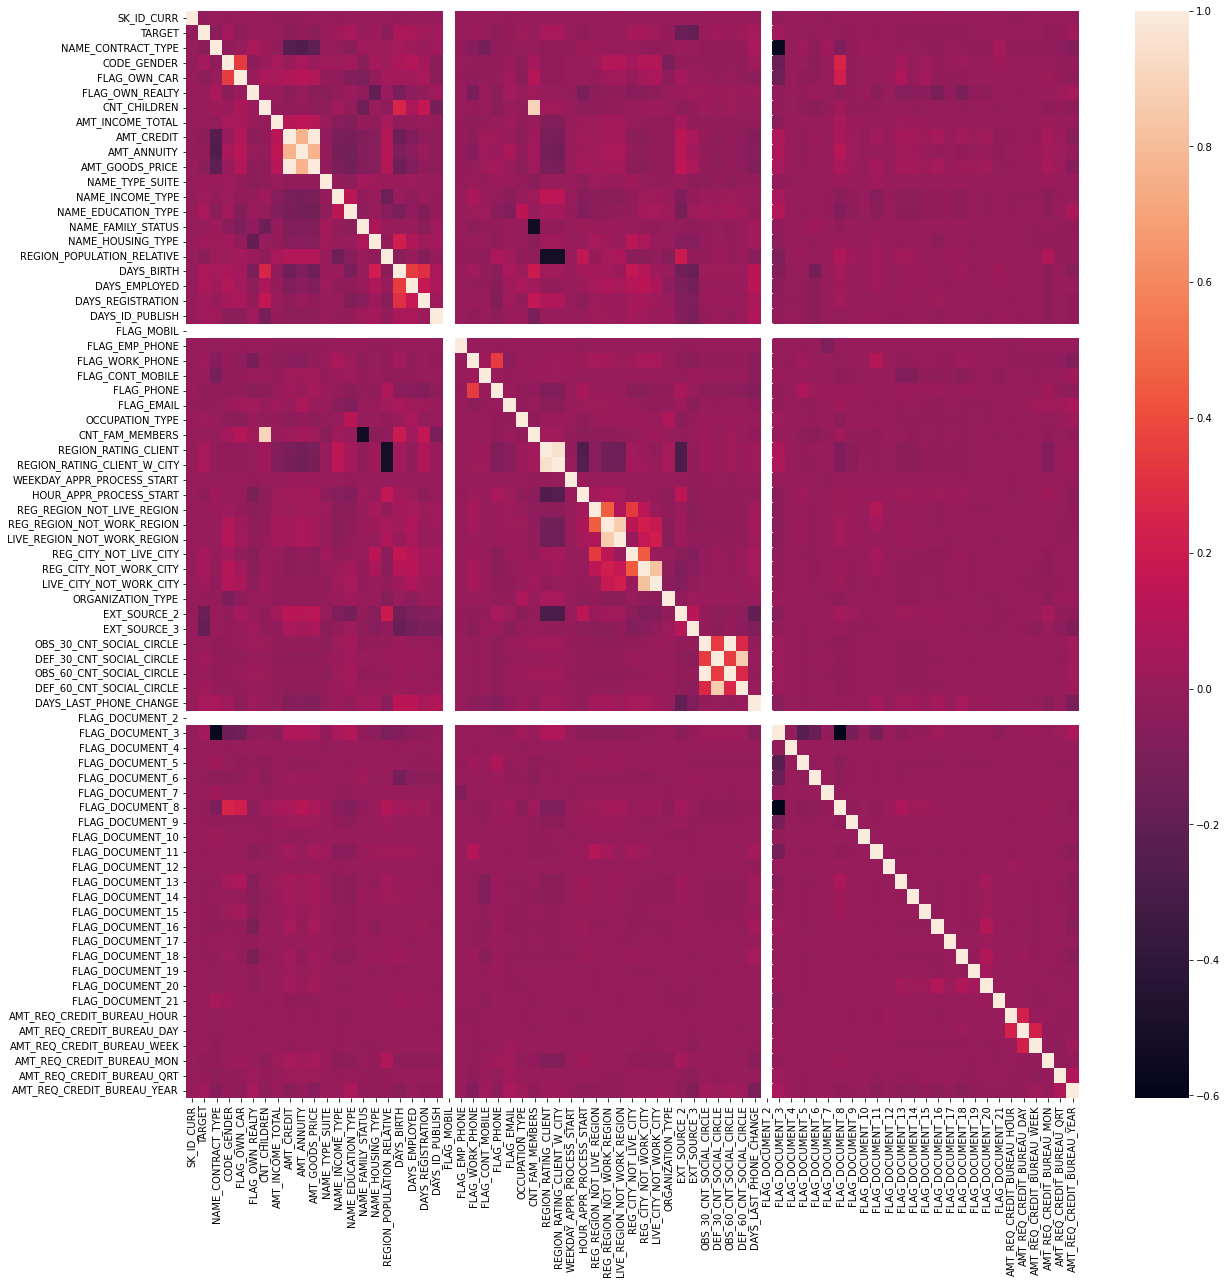

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr())

In [ ]:
corr_matrix = data_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
to_drop_hicorr
['CNT_FAM_MEMBERS',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE']

['CNT_FAM_MEMBERS',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [ ]:
data_train.drop(to_drop_hicorr, axis=1, inplace=True)

In [ ]:
data_test.drop(to_drop_hicorr, axis=1, inplace=True)

In [ ]:
numerical_cols = [col for col in data_train.columns.tolist() if col not in categorical_data + ['TARGET']]
numerical_cols = [col for col in data_test.columns.tolist() if col not in categorical_data]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data_train[numerical_cols]),columns= numerical_cols)

In [ ]:
data_train.drop('SK_ID_CURR', axis=1, inplace=True)
data_test.drop('SK_ID_CURR', axis=1, inplace=True)

# Check Data Target (balanced/imbalanced)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


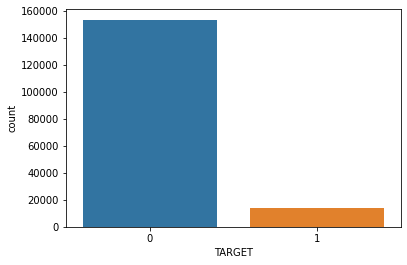

In [ ]:
sns.countplot(data_train['TARGET'])

Terjadi imbalanced data oversampling yaitu terdapat majority class yang jauh lebih besar pada Target=0 (tidak memiliki kesulitan pembayaran). Imbalanced data dapat menghasilkan data yang tidak akurat.
Solusi untuk mengatasi imbalanced data salah satunya menggunakan teknik SMOTE.Metode Synthetic Minority Over-samplingTechnique (SMOTE) merupakan teknik yang mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara membuat instance baru dari minority class dengan pembentukan convex kombinasi dari instances yang saling berdekatan

# Modelling

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x = data_train.drop('TARGET', axis=1)
y = data_train['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
sm = SMOTE(random_state=32, k_neighbors=2)
x_train, y_train = sm.fit_resample(x_train, y_train)

# Algoritma XGBoostClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
import seaborn as sns

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_test = xgb.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

Accuracy: 0.9012102784236571
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     30679
           1       0.21      0.06      0.09      2867

    accuracy                           0.90     33546
   macro avg       0.57      0.52      0.52     33546
weighted avg       0.86      0.90      0.87     33546



In [ ]:
xgb.fit(x_test, y_test)
y_pred_test = xgb.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

Accuracy: 0.9153997495975675
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30679
           1       0.78      0.01      0.03      2867

    accuracy                           0.92     33546
   macro avg       0.85      0.51      0.49     33546
weighted avg       0.90      0.92      0.88     33546



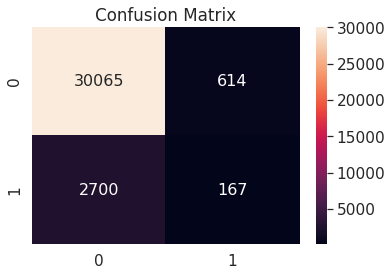

In [ ]:
#confusion matrix
cm_array = metrics.confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(cm_array,
                     index=["0", "1"],
                     columns=["0", "1"])
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test)

0.5067966573049763

In [ ]:
results_dict = {}

Hyperparamater XGBoostClassifier

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb_grid = XGBClassifier(learning_rate=0.02, n_estimators=600, param_grid = params, objective='binary:logistic', silent=True, nthread=1)

In [ ]:
xgb_grid.fit(x, y)

XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=1,
              param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                          'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                          'min_child_weight': [1, 5, 10],
                          'subsample': [0.6, 0.8, 1.0]},
              silent=True)

In [ ]:
y_pred_grid = xgb_grid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grid))
print(metrics.classification_report(y_test, y_pred_grid))

Accuracy: 0.915161271090443
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30679
           1       0.80      0.01      0.02      2867

    accuracy                           0.92     33546
   macro avg       0.86      0.50      0.49     33546
weighted avg       0.91      0.92      0.88     33546



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_grid)

0.5047690685687785

# Algoritma Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(x_train,y_train)

In [ ]:
prediction = logreg.predict(x_test)

In [ ]:
print('Training Accuracy:', logreg.score(x_train,y_train))
print('Testing Accuracy:', logreg.score(x_test,y_test))

Training Accuracy: 0.5630067402559343
Testing Accuracy: 0.5571454122697191


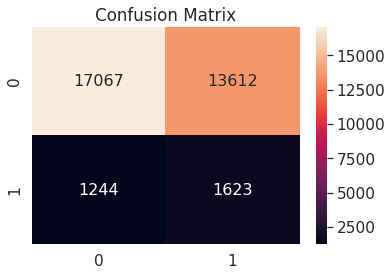

In [ ]:
#confusion matrix
cm_array = metrics.confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(cm_array,
                     index=["0", "1"],
                     columns=["0", "1"])
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.56      0.70     30679
           1       0.11      0.57      0.18      2867

    accuracy                           0.56     33546
   macro avg       0.52      0.56      0.44     33546
weighted avg       0.86      0.56      0.65     33546



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction)

0.5612029206236755

Hyperparameter Logistic Regression

In [ ]:
penalty = ['l1', 'l2']
C = np.logspace(1,5,10)

In [ ]:
hyperparameters = dict(penalty=penalty, C=C)

In [ ]:
logreg = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg, hyperparameters, cv=5)

In [ ]:
best_model = clf.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 10.0


In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     30679
           1       0.00      0.00      0.00      2867

    accuracy                           0.91     33546
   macro avg       0.46      0.50      0.48     33546
weighted avg       0.84      0.91      0.87     33546



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
roc_auc_score(y_test, y_pred)

0.5

# Saran


Beberapa hal yang dapat dilakukan untuk project ini:
1. Jika ingin jumlah data yang lebih banyak dapat mengisi nilai-nilai yang kosong (fill the missing value)
2. Dapat menggunakan metode algoritma lainnya seperti Random Forest Classifier
3. Melakukan pemeriksaan atau memastikan bahwa model yang telah dibuat tidak overfitting. Hal ini dapat dilakukan dengan mencoba membandingkan hasil performa model ketika diprediksi terhadap data training dan ketika diprediksi terhadap data testing.